In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import RocCurveDisplay


C:\Users\prana\AppData\Local\Temp\ipykernel_8440\3241925194.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_var = np.where(X_train.dtypes != np.float)[0]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Accuracy of CATBoost on the training set is:  87.7215164865559 %
Accuracy of CATBoost on the testing set is:  83.35802761808807 %


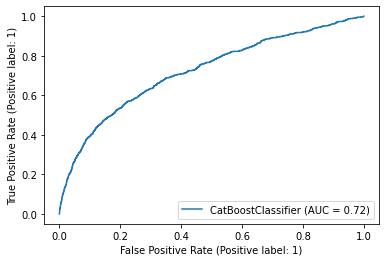

In [18]:
#Code Block
#Read in the train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')



#Split the train data into X_train and Y_train
X_train = train_data.drop(columns=['readmitted'], axis=1)
y_train = train_data['readmitted']

#Split the test_data into X_test and Y_test
X_test = test_data.drop(columns = ['readmitted'], axis=1)
y_test = test_data['readmitted']

#Get the categorical_variables from X_Train
categorical_var = np.where(X_train.dtypes != np.float)[0]

#Import the CATBoost Classifer
from catboost import CatBoostClassifier

#Make the CATBoost Classifer with 5000 iterations and a learning rate of .1
clf = CatBoostClassifier(
    iterations=5000, 
    loss_function='Logloss',
    class_weights={0:1,1:20}
)
#Fit the model on X_train, y_train, and make a plot of it
clf.fit(X_train, y_train, cat_features = categorical_var,verbose=False, plot = True)

#Import accuracy score
from sklearn.metrics import accuracy_score

#Test the accuracy of the model
#predict the target on the train dataset
predict_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, predict_train)
print("Accuracy of CATBoost on the training set is: ", accuracy_train*100, "%")
#Predict the target on the test dataset
predict_test = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, predict_test)

#Print the accuracy of the model
print("Accuracy of CATBoost on the testing set is: ", accuracy_test*100, "%")
from sklearn.metrics import (accuracy_score,roc_auc_score)


plot = RocCurveDisplay.from_estimator(clf, X_test, y_test)